In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [17]:
filepath_1 = '/Users/eliasrapkin-siles/Downloads/Machine Learning 1/Project/22Q2 Files/CRISPR_gene_effect.csv'
CRISPR_gene_effect = pd.read_csv(filepath_1)

filepath_2 = '/Users/eliasrapkin-siles/Downloads/Machine Learning 1/Project/22Q2 Files/CRISPR_gene_dependency.csv'
CRISPR_gene_dependency = pd.read_csv(filepath_2)

filepath_3 = '/Users/eliasrapkin-siles/Downloads/Machine Learning 1/Project/22Q2 Files/sample_info.csv'
sample_info = pd.read_csv(filepath_3)

In [18]:
sample_info = sample_info[['DepMap_ID', 'sex', 'sample_collection_site', 'primary_disease', 'Subtype', 'age', 'lineage', 'lineage_subtype',
                           'lineage_sub_subtype','Cellosaurus_NCIt_disease']]

In [19]:
CRISPR_gene_effect_master_df = pd.merge(sample_info, CRISPR_gene_effect, on="DepMap_ID", how="outer")
CRISPR_gene_dependency_master_df = pd.merge(sample_info, CRISPR_gene_dependency, on="DepMap_ID", how="outer")

Random Forest Accuracy: 0.40
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       0.70      1.00      0.82         7
           2       0.20      0.91      0.32        11
           3       0.67      0.33      0.44         6
           4       0.67      0.18      0.29        11
           5       0.69      0.64      0.67        14
           6       1.00      0.33      0.50         3
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         3
          11       1.00      0.20      0.33         5
          12       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          17   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

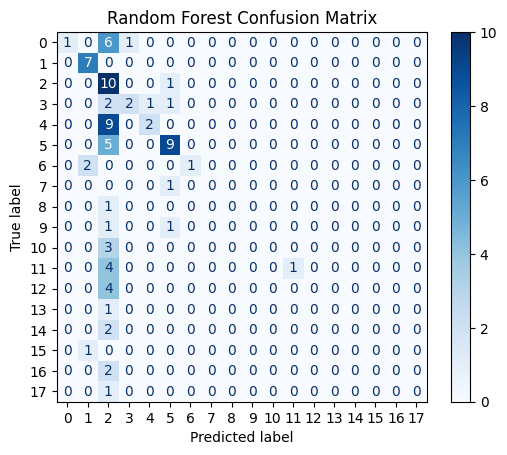

In [15]:
# Select features (numerical only) and target
X = CRISPR_gene_effect_master_df.drop(['DepMap_ID', 'primary_disease'], axis=1).select_dtypes(include=np.number)
y = CRISPR_gene_effect_master_df['primary_disease']

# Encode the target variable
y = pd.factorize(y)[0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=200,
    random_state=42
)

# Train the Random Forest on the training set
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Display the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

In [13]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Display best parameters and score
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search_rf.best_score_:.2f}")

# Use the best model for predictions
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate the optimized model
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Optimized Random Forest Accuracy: {accuracy_best_rf:.2f}")
print("Optimized Random Forest Classification Report:")
print(classification_report(y_test, y_pred_best_rf))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.47
Optimized Random Forest Accuracy: 0.40
Optimized Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       0.70      1.00      0.82         7
           2       0.20      0.91      0.32        11
           3       0.67      0.33      0.44         6
           4       0.67      0.18      0.29        11
           5       0.69      0.64      0.67        14
           6       1.00      0.33      0.50         3
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         3
          11       1.00      0.20      0.33         5
          12       0.00      0.00      0.00         4
          14   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

Random Forest Accuracy: 0.28
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.14      0.22        14
           1       0.62      0.42      0.50        24
           2       0.56      0.24      0.33        21
           3       0.75      0.43      0.55        21
           4       0.00      0.00      0.00        11
           5       0.15      0.95      0.26        44
           6       0.00      0.00      0.00        16
           7       1.00      0.09      0.17        22
           8       0.75      0.23      0.35        13
           9       1.00      0.17      0.29         6
          10       0.64      0.36      0.46        25
          11       0.00      0.00      0.00         7
          12       0.50      0.20      0.29        20
          13       0.00      0.00      0.00        14
          14       0.00      0.00      0.00        28
          15       0.00      0.00      0.00        12
          16   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

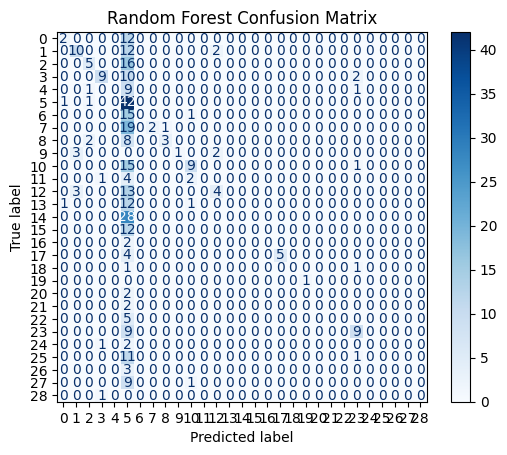

In [22]:
# Select features (numerical only) and target
X = CRISPR_gene_dependency_master_df.drop(['DepMap_ID', 'primary_disease'], axis=1).select_dtypes(include=np.number)
y = CRISPR_gene_dependency_master_df['primary_disease']

# Encode the target variable
y = pd.factorize(y)[0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=10,
    n_estimators=100,
    random_state=42
)

# Train the Random Forest on the training set
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Display the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

In [21]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Display best parameters and score
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search_rf.best_score_:.2f}")

# Use the best model for predictions
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate the optimized model
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Optimized Random Forest Accuracy: {accuracy_best_rf:.2f}")
print("Optimized Random Forest Classification Report:")
print(classification_report(y_test, y_pred_best_rf))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.29
Optimized Random Forest Accuracy: 0.28
Optimized Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.14      0.22        14
           1       0.62      0.42      0.50        24
           2       0.56      0.24      0.33        21
           3       0.75      0.43      0.55        21
           4       0.00      0.00      0.00        11
           5       0.15      0.95      0.26        44
           6       0.00      0.00      0.00        16
           7       1.00      0.09      0.17        22
           8       0.75      0.23      0.35        13
           9       1.00      0.17      0.29         6
          10       0.64      0.36      0.46        25
          11       0.00      0.00      0.00         7
          12       0.50      0.20      0.29        20
          13  

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  